## Assignment 4: Pandas

This assignment is about data processing and plotting.

### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in *a single Jupyter Notebook*.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook `12-Assignments` for more information.

## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook.
With the help of Pandas' DataFrame do the following
1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)

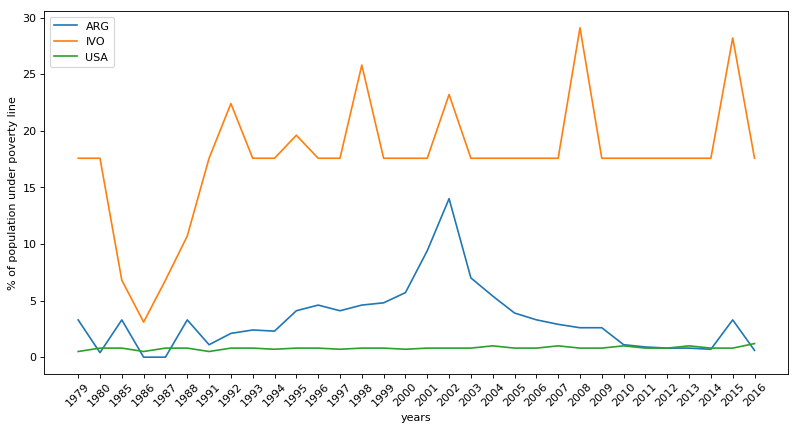

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

filename = "API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv"

df = pd.read_csv(filename, header=2)
df.drop([0,1])

# creating series for arg, ivo and usa
# below line finds country from name and takes the index value as an int, so it can be used dynamically in iloc
arg_index = df[df['Country Name'] == 'Argentina'].index.values.astype(int)[0]
arg = df.iloc[arg_index, :]
arg = arg.dropna()
arg = arg[4:]

ivo_index = df[df['Country Name'] == "Cote d'Ivoire"].index.values.astype(int)[0]
ivo = df.iloc[ivo_index, :]
ivo = ivo.dropna()
ivo = ivo[4:]

usa_index = df[df['Country Name'] == "United States"].index.values.astype(int)[0]
usa = df.iloc[usa_index, :]
usa = usa.dropna()
usa = usa[4:]

# creating dict of series
my_dict = {'ARG': arg, 'IVO': ivo, 'USA': usa}

# set size for figure
plt.figure(figsize=(12,6), dpi=80)

# creating dataframe from dict
my_df = pd.DataFrame(my_dict)

# filling the missing values with the mean value for each country
my_df = my_df.fillna(my_df.mean())

# print(my_df)

# rotates years so they are readable
plt.xticks(rotation=45)
plt.plot(my_df)
plt.ylabel("% of population under poverty line")
plt.xlabel("years")
plt.legend(my_dict)
plt.show()

2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

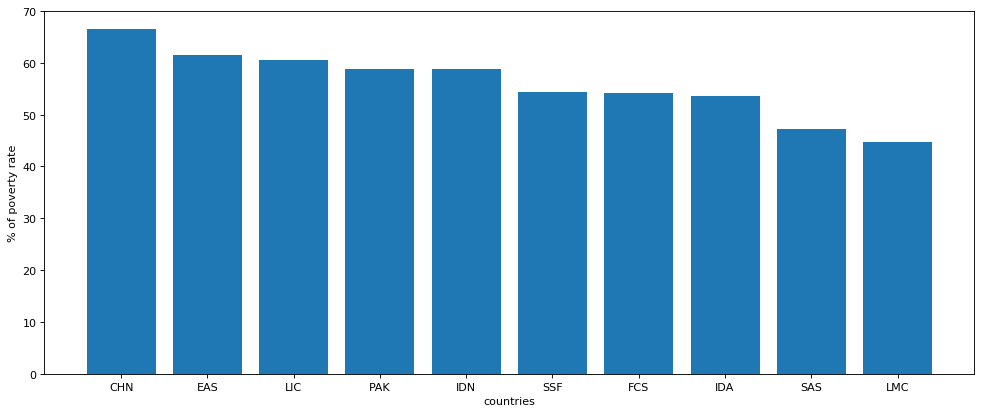

In [3]:
def calculate_poverty_rates_in_country_by_year(year):
    # Sort poverty values in year
    data = df.sort_values(year,0,False)
    # Country Codes
    y = data['Country Code'][:10]
    # Values of poverty
    x = data[year][:10]
    return [y,x]

y,x = calculate_poverty_rates_in_country_by_year('1990')
plt.figure(figsize=(15,6), dpi=80)
plt.bar(y,x)
plt.ylabel("% of poverty rate")
plt.xlabel("countries")
plt.show()

#calculate_the_highest_poverty_country(data)


3. Show the development of absolute poverty in all the central american countries. Hand in:
  1. A description of what graphical representation you think is best for this task
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
  2. The actual graphical representation in a Jupyter Notebook

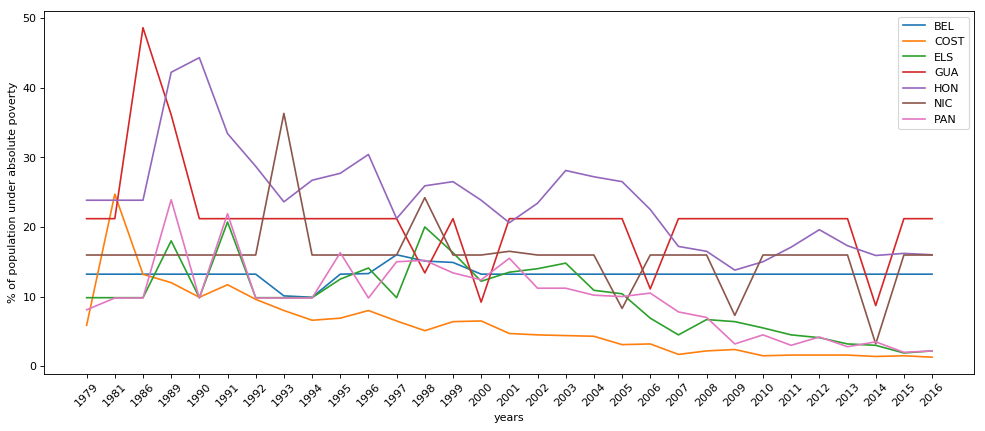

In [16]:
# creating series for arg, ivo and usa
bel_index = df[df['Country Name'] == "Belize"].index.values.astype(int)[0]
bel = df.iloc[bel_index, :]
bel = bel.dropna()
bel = bel[4:]

cost_index = df[df['Country Name'] == "Costa Rica"].index.values.astype(int)[0]
cost = df.iloc[cost_index, :]
cost = cost.dropna()
cost = cost[4:]

els_index = df[df['Country Name'] == "El Salvador"].index.values.astype(int)[0]
els = df.iloc[els_index, :]
els = els.dropna()
els = els[4:]

gua_index = df[df['Country Name'] == "Guatemala"].index.values.astype(int)[0]
gua = df.iloc[gua_index, :]
gua = gua.dropna()
gua = gua[4:]

hon_index = df[df['Country Name'] == "Honduras"].index.values.astype(int)[0]
hon = df.iloc[hon_index, :]
hon = hon.dropna()
hon = hon[4:]

nic_index = df[df['Country Name'] == "Nicaragua"].index.values.astype(int)[0]
nic = df.iloc[nic_index, :]
nic = nic.dropna()
nic = nic[4:]

pan_index = df[df['Country Name'] == "Panama"].index.values.astype(int)[0]
pan = df.iloc[pan_index, :]
pan = pan.dropna()
pan = pan[4:]

# creating dict of series
my_dict = {'BEL': bel, 'COST': cost, 'ELS': els, 'GUA': gua, 'HON': hon, 'NIC': nic, 'PAN': pan}

plt.figure(figsize=(15,6), dpi=80)

# creating dataframe from dict
my_df = pd.DataFrame(my_dict)
# filling the missing values with the mean value for each country
my_df = my_df.fillna(my_df.mean())

plt.xticks(rotation=45)
plt.plot(my_df)
plt.legend(my_dict)
plt.ylabel("% of population under absolute poverty")
plt.xlabel("years")
plt.show()

# A description of what graphical representation you think is best for this task:
# For our use, this representation is adequate for showing development in poverty rates over the years.
# Another solution which might have given a better overview is using subplots as to show different countries
# in different plots.

4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
  1. A description of why that question is interesting
  2. A visualisation of the question in your Jupyter Notebook
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html

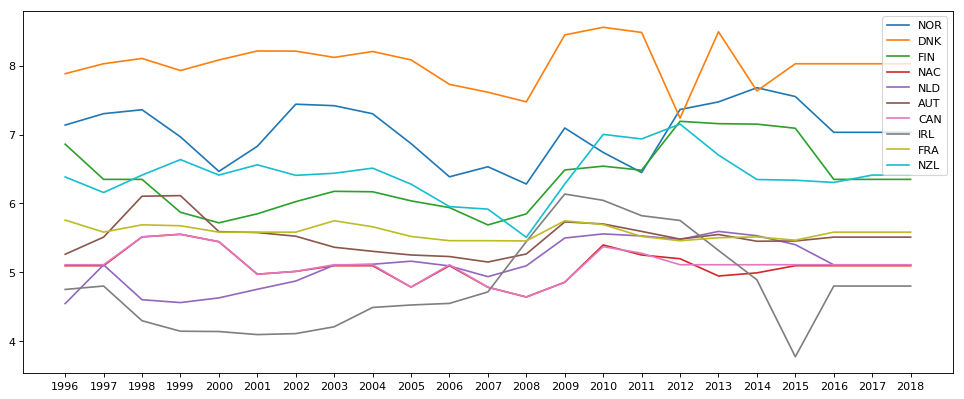

In [42]:
filename = "API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_10473740.csv"

df = pd.read_csv(filename, header=2)
df.drop([0,1])

#calculate the sum'
def calculate_sum(array):
    return pd.DataFrame.sum(array)
                                
#top ten countries that spend money on education
def process(data):
    summed_dataFrame = []
    # for loop every country 
    for country_data in data.values:
        # Creating a dataframe ro remove "NaN"
        country_data = pd.DataFrame(country_data)
        country_data = country_data.dropna()
        # Appending calculated sum for each country
        summed_dataFrame.append(calculate_sum(country_data[4:]))
    # Casting it to a DataFrame to use sort
    summed_dataFrame = pd.DataFrame(summed_dataFrame)
    #Sort Countries and get top 10
    summed_dataFrame = summed_dataFrame.sort_values(0,ascending=False)[:10]
    #return top 10 countries
    return summed_dataFrame

# returned value of the process
values = process(df);
# get only the country codes
country_code = df['Country Code'].iloc[values.index]


# Get all values 1960+40 til now, 
#  .T = reflect the DataFrame over its diagonal. 
ts_df = df.iloc[country_code.index, 40:-1].T
ts_df = ts_df.fillna(ts_df.mean())
# renaming the "lines" by Country Code 
ts_df = ts_df.rename(columns=dict(country_code))
plt.figure(figsize=(15,6), dpi=80)
plt.plot(ts_df)
plt.legend(ts_df, loc='upper right')
plt.show()

##########################################################
# This Graph Demonstrate how much money the Government have spent on education
# This is useful, if you want to compare socialist government and Capitalism
# 
# The spaces between the lines show how scared they were to show it... 
#
#
#